<a href="https://colab.research.google.com/github/Sohamch03/Linear-Regression-with-the-California-Housing-Dataset/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['MedHouseVal'] = data.target

# Display the first 5 rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


Understanding the Dataset

In [6]:
#Number of Rows and Columns
#Check the dimensions of the dataset
print(df.shape)

(20640, 9)


This means there are 20,640 rows (samples) and 9 columns (8 features + 1 target).

Feature Names

In [7]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


Dataset Description

In [9]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

 EDA (Exploratory Data Analysis)

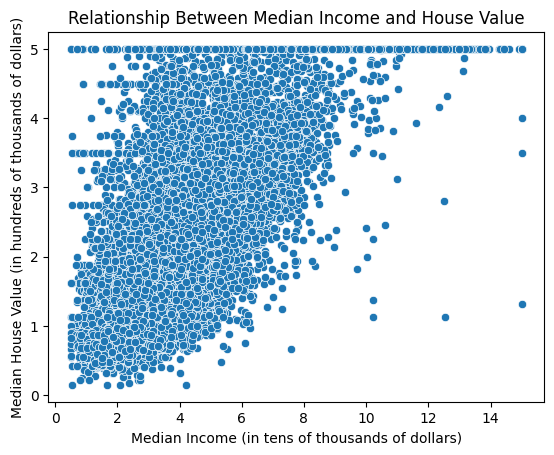

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of MedInc vs MedHouseVal
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])
plt.xlabel("Median Income (in tens of thousands of dollars)")
plt.ylabel("Median House Value (in hundreds of thousands of dollars)")
plt.title("Relationship Between Median Income and House Value")
plt.show()


Summary of the Plot

-This code creates a scatter plot showing the relationship between median income and median house value in different districts:

-Each point represents a district.

-The x-axis shows the median income (in tens of thousands of dollars).

-The y-axis shows the median house value (in hundreds of thousands of dollars).

-The plot helps visualize if there is a trend or correlation between income and house prices.

Building the Linear Regression Model

Importing Libraries

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [14]:
# Define the predictor and target
X = df[['MedInc']]
y = df['MedHouseVal']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

Evaluating the Model

In [17]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.71
R² Score: 0.46


Visualizing the Regression Line

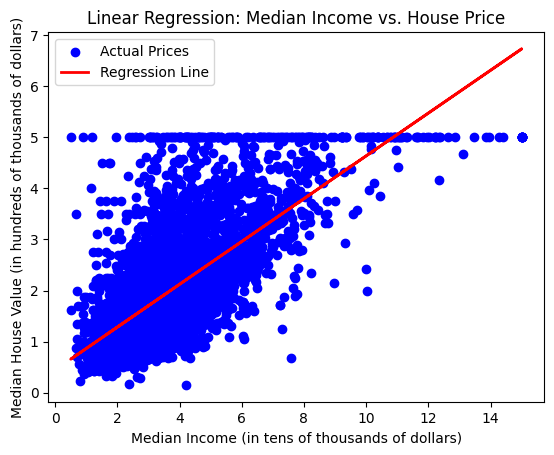

In [18]:
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Median Income (in tens of thousands of dollars)")
plt.ylabel("Median House Value (in hundreds of thousands of dollars)")
plt.title("Linear Regression: Median Income vs. House Price")
plt.legend()
plt.show()


Predicting new values

In [19]:
# Ensure new_data has the correct feature name 'MedInc'
new_data = pd.DataFrame([[6]], columns=['MedInc'])

# Make the prediction
predicted_price = model.predict(new_data)

# Display the predicted price
print(f"Predicted House Price for a Median Income of $60,000: ${predicted_price[0] * 100_000:.2f}")


Predicted House Price for a Median Income of $60,000: $296062.83
